本文是对pandas官网上《10 Minutes to pandas》的一个简单的翻译，原文在[这里](http://pandas.pydata.org/pandas-docs/stable/10min.html)。这篇文章是对pandas的一个简单的介绍，详细的介绍请参考：[Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)。习惯上，我们会按下面格式引入所需要的包：

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

# 一、创建对象

可以通过[Data Structure Intro Section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro)来查看有关该节内容的详细信息。

1. 可以通过传递一个list对象来创建一个Series，pandas会默认创建整型索引：

In [5]:
s = pd.Series([1,3,5,np.nan,6,8])

In [6]:
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

2.通过传递一个numpy array，时间索引以及列标签来创建一个DataFrame：

In [7]:
dates = pd.date_range('20130101', periods=6)

In [8]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [10]:
df

,A,B,C,D
2013-01-01,-0.397636,1.091843,0.621826,0.643196
2013-01-02,0.047735,-0.693675,1.588932,-0.774878
2013-01-03,-0.309450,-0.951779,0.028030,-2.033464
2013-01-04,-0.905928,0.807286,1.032849,0.160724
2013-01-05,-0.195194,-0.221892,-1.843014,-1.704663
2013-01-06,0.773058,-1.486186,0.876408,2.159035


3.通过传递一个能够被转换成类似序列结构的字典对象来创建一个DataFrame：

In [11]:
df2 = pd.DataFrame({'A':1.,
                    'B':pd.Timestamp('20130102'),
                    'C':pd.Series(1, index=list(range(4)),dtype='float32'),
                    'D':np.array([3] * 4, dtype='int32'),
                    'E':pd.Categorical(['test','train', 'test','train']),
                    'F':'foo'
                   })

In [12]:
df2

,A,B,C,D,E,F
0,1,2013-01-02,1,3,test,foo
1,1,2013-01-02,1,3,train,foo
2,1,2013-01-02,1,3,test,foo
3,1,2013-01-02,1,3,train,foo


4.查看不同列的数据类型：

In [13]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

5.使用Tab自动补全功能会自动识别所有的属性以及自定义的列

# 二、查看数据

详情请参阅：[Basics Section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics)

1.查看Frame中头部和尾部的行：

In [14]:
df.head()

,A,B,C,D
2013-01-01,-0.397636,1.091843,0.621826,0.643196
2013-01-02,0.047735,-0.693675,1.588932,-0.774878
2013-01-03,-0.309450,-0.951779,0.028030,-2.033464
2013-01-04,-0.905928,0.807286,1.032849,0.160724
2013-01-05,-0.195194,-0.221892,-1.843014,-1.704663


In [15]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.905928,0.807286,1.032849,0.160724
2013-01-05,-0.195194,-0.221892,-1.843014,-1.704663
2013-01-06,0.773058,-1.486186,0.876408,2.159035


2.显示索引、列和底层的numpy数据：

In [16]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.values

array([[-0.39763564,  1.09184269,  0.62182584,  0.64319558],
       [ 0.0477345 , -0.69367452,  1.58893209, -0.77487822],
       [-0.30944982, -0.95177856,  0.0280302 , -2.03346358],
       [-0.9059281 ,  0.80728618,  1.03284944,  0.16072416],
       [-0.19519391, -0.22189217, -1.84301383, -1.7046631 ],
       [ 0.77305772, -1.48618624,  0.87640846,  2.15903469]])

3.describe()函数对于数据的快速统计汇总：

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.164569,-0.242400,0.384172,-0.258342
std,0.556791,1.013542,1.204840,1.571102
min,-0.905928,-1.486186,-1.843014,-2.033464
25%,-0.375589,-0.887253,0.176479,-1.472217
50%,-0.252322,-0.457783,0.749117,-0.307077
75%,-0.012998,0.549992,0.993739,0.522578
max,0.773058,1.091843,1.588932,2.159035


4.对数据的转置(tranverse):

In [20]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.397636,0.047735,-0.309450,-0.905928,-0.195194,0.773058
B,1.091843,-0.693675,-0.951779,0.807286,-0.221892,-1.486186
C,0.621826,1.588932,0.028030,1.032849,-1.843014,0.876408
D,0.643196,-0.774878,-2.033464,0.160724,-1.704663,2.159035


5.按轴进行排序

In [21]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2013-01-01,0.643196,0.621826,1.091843,-0.397636
2013-01-02,-0.774878,1.588932,-0.693675,0.047735
2013-01-03,-2.033464,0.028030,-0.951779,-0.309450
2013-01-04,0.160724,1.032849,0.807286,-0.905928
2013-01-05,-1.704663,-1.843014,-0.221892,-0.195194
2013-01-06,2.159035,0.876408,-1.486186,0.773058


6.按值进行排序

In [22]:
df.sort(columns='B')

,A,B,C,D
2013-01-06,0.773058,-1.486186,0.876408,2.159035
2013-01-03,-0.309450,-0.951779,0.028030,-2.033464
2013-01-02,0.047735,-0.693675,1.588932,-0.774878
2013-01-05,-0.195194,-0.221892,-1.843014,-1.704663
2013-01-04,-0.905928,0.807286,1.032849,0.160724
2013-01-01,-0.397636,1.091843,0.621826,0.643196


# 三、选择

虽然标准的Python/Numpy的选择和设置表达式都能够直接派上用场，但是作为工程使用的代码，我们推荐使用经过优化的pandas数据访问方式：.at,.iat,
.loc,.iloc和.ix详情请参阅[Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing)
                                                 和[MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

## 获取

1.选择一个单独的列，这将会返回一个Series，等同于df.A:

In [23]:
df

,A,B,C,D
2013-01-01,-0.397636,1.091843,0.621826,0.643196
2013-01-02,0.047735,-0.693675,1.588932,-0.774878
2013-01-03,-0.309450,-0.951779,0.028030,-2.033464
2013-01-04,-0.905928,0.807286,1.032849,0.160724
2013-01-05,-0.195194,-0.221892,-1.843014,-1.704663
2013-01-06,0.773058,-1.486186,0.876408,2.159035


In [24]:
df['A']

2013-01-01   -0.397636
2013-01-02    0.047735
2013-01-03   -0.309450
2013-01-04   -0.905928
2013-01-05   -0.195194
2013-01-06    0.773058
Freq: D, Name: A, dtype: float64

2.通过[]进行选择，这将会对行进行切片

In [25]:
df[0:3]

,A,B,C,D
2013-01-01,-0.397636,1.091843,0.621826,0.643196
2013-01-02,0.047735,-0.693675,1.588932,-0.774878
2013-01-03,-0.309450,-0.951779,0.028030,-2.033464


In [26]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.047735,-0.693675,1.588932,-0.774878
2013-01-03,-0.309450,-0.951779,0.028030,-2.033464
2013-01-04,-0.905928,0.807286,1.032849,0.160724


## 通过标签选择

1.使用标签来获取一个交叉的区域

In [27]:
df

,A,B,C,D
2013-01-01,-0.397636,1.091843,0.621826,0.643196
2013-01-02,0.047735,-0.693675,1.588932,-0.774878
2013-01-03,-0.309450,-0.951779,0.028030,-2.033464
2013-01-04,-0.905928,0.807286,1.032849,0.160724
2013-01-05,-0.195194,-0.221892,-1.843014,-1.704663
2013-01-06,0.773058,-1.486186,0.876408,2.159035


In [28]:
df.loc[dates[0]]

A   -0.397636
B    1.091843
C    0.621826
D    0.643196
Name: 2013-01-01 00:00:00, dtype: float64

2.通过标签来在多个轴上进行选择

In [29]:
df.loc[:,['A', 'B']]

,A,B
2013-01-01,-0.397636,1.091843
2013-01-02,0.047735,-0.693675
2013-01-03,-0.309450,-0.951779
2013-01-04,-0.905928,0.807286
2013-01-05,-0.195194,-0.221892
2013-01-06,0.773058,-1.486186


3.标签切片

In [30]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,0.047735,-0.693675
2013-01-03,-0.309450,-0.951779
2013-01-04,-0.905928,0.807286


4.对于返回的对象进行维度缩减

In [31]:
df.loc['20130102', ['A','B']]

A    0.047735
B   -0.693675
Name: 2013-01-02 00:00:00, dtype: float64

5.获取一个标量

In [32]:
df.loc[dates[0], 'A']

-0.39763563616930675

6.快速访问一个标量（与上一个方法等价）

In [33]:
df.at[dates[0], 'A']

-0.39763563616930675

## 通过位置选择

1.通过传递数值进行位置选择（选择的是行）

In [34]:
df

,A,B,C,D
2013-01-01,-0.397636,1.091843,0.621826,0.643196
2013-01-02,0.047735,-0.693675,1.588932,-0.774878
2013-01-03,-0.309450,-0.951779,0.028030,-2.033464
2013-01-04,-0.905928,0.807286,1.032849,0.160724
2013-01-05,-0.195194,-0.221892,-1.843014,-1.704663
2013-01-06,0.773058,-1.486186,0.876408,2.159035


In [35]:
df.iloc[3]

A   -0.905928
B    0.807286
C    1.032849
D    0.160724
Name: 2013-01-04 00:00:00, dtype: float64

2.通过数值进行切片，与numpy/python中的情况类似

In [36]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.905928,0.807286
2013-01-05,-0.195194,-0.221892


3.通过指定一个位置的列表，与numpy/python中的情况类似

In [37]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.047735,1.588932
2013-01-03,-0.309450,0.028030
2013-01-05,-0.195194,-1.843014


4.对行进行切片

In [38]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.047735,-0.693675,1.588932,-0.774878
2013-01-03,-0.309450,-0.951779,0.028030,-2.033464


5.对列进行切片

In [39]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.091843,0.621826
2013-01-02,-0.693675,1.588932
2013-01-03,-0.951779,0.028030
2013-01-04,0.807286,1.032849
2013-01-05,-0.221892,-1.843014
2013-01-06,-1.486186,0.876408


6.获取特定的值

In [40]:
df.iloc[1,1]

-0.69367452164656151

In [41]:
df.iat[1,1]

-0.69367452164656151

## 布尔索引

In [42]:
df

,A,B,C,D
2013-01-01,-0.397636,1.091843,0.621826,0.643196
2013-01-02,0.047735,-0.693675,1.588932,-0.774878
2013-01-03,-0.309450,-0.951779,0.028030,-2.033464
2013-01-04,-0.905928,0.807286,1.032849,0.160724
2013-01-05,-0.195194,-0.221892,-1.843014,-1.704663
2013-01-06,0.773058,-1.486186,0.876408,2.159035


1.使用一个单独列的值来选择数据：

In [43]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.047735,-0.693675,1.588932,-0.774878
2013-01-06,0.773058,-1.486186,0.876408,2.159035


2.使用where操作来选择数据：

In [44]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.091843,0.621826,0.643196
2013-01-02,0.047735,NaN,1.588932,NaN
2013-01-03,NaN,NaN,0.028030,NaN
2013-01-04,NaN,0.807286,1.032849,0.160724
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,0.773058,NaN,0.876408,2.159035


3.使用isin()方法来过滤：

In [45]:
df2 = df.copy()

In [46]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [47]:
df2

,A,B,C,D,E
2013-01-01,-0.397636,1.091843,0.621826,0.643196,one
2013-01-02,0.047735,-0.693675,1.588932,-0.774878,one
2013-01-03,-0.309450,-0.951779,0.028030,-2.033464,two
2013-01-04,-0.905928,0.807286,1.032849,0.160724,three
2013-01-05,-0.195194,-0.221892,-1.843014,-1.704663,four
2013-01-06,0.773058,-1.486186,0.876408,2.159035,three


In [48]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.309450,-0.951779,0.028030,-2.033464,two
2013-01-05,-0.195194,-0.221892,-1.843014,-1.704663,four


## 设置

1.设置一个新的列：

In [49]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [50]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [51]:
df['F'] = s1

In [52]:
df

,A,B,C,D,F
2013-01-01,-0.397636,1.091843,0.621826,0.643196,NaN
2013-01-02,0.047735,-0.693675,1.588932,-0.774878,1
2013-01-03,-0.309450,-0.951779,0.028030,-2.033464,2
2013-01-04,-0.905928,0.807286,1.032849,0.160724,3
2013-01-05,-0.195194,-0.221892,-1.843014,-1.704663,4
2013-01-06,0.773058,-1.486186,0.876408,2.159035,5


2.通过标签设置新的值：

In [53]:
df.at[dates[0],'A'] = 0

3.通过位置设置新的值：

In [54]:
df.iat[0,1] = 0

4.通过一个numpy数值设置一组新值：

In [55]:
df.loc[:, 'D'] = np.array([5] * len(df))

上述操作结果如下：

In [56]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.621826,5,NaN
2013-01-02,0.047735,-0.693675,1.588932,5,1
2013-01-03,-0.309450,-0.951779,0.028030,5,2
2013-01-04,-0.905928,0.807286,1.032849,5,3
2013-01-05,-0.195194,-0.221892,-1.843014,5,4
2013-01-06,0.773058,-1.486186,0.876408,5,5


5.通过where操作来设置新的值

In [57]:
df2 = df.copy()

In [58]:
df2[df2 > 0] = -df2

In [59]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.621826,-5,NaN
2013-01-02,-0.047735,-0.693675,-1.588932,-5,-1
2013-01-03,-0.309450,-0.951779,-0.028030,-5,-2
2013-01-04,-0.905928,-0.807286,-1.032849,-5,-3
2013-01-05,-0.195194,-0.221892,-1.843014,-5,-4
2013-01-06,-0.773058,-1.486186,-0.876408,-5,-5


# 四、缺失值处理

在pandas中，使用np.nan来代替缺失值，这些值将默认不会包含在计算中，详情请参阅：[Missing Data Section](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)

In [60]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.621826,5,NaN
2013-01-02,0.047735,-0.693675,1.588932,5,1
2013-01-03,-0.309450,-0.951779,0.028030,5,2
2013-01-04,-0.905928,0.807286,1.032849,5,3
2013-01-05,-0.195194,-0.221892,-1.843014,5,4
2013-01-06,0.773058,-1.486186,0.876408,5,5


1.reindex()方法可以对指定轴上的索引进行改变/增加/删除操作，这将返回原始数据的一个拷贝：

In [61]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [62]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [63]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.621826,5,NaN,1
2013-01-02,0.047735,-0.693675,1.588932,5,1,1
2013-01-03,-0.309450,-0.951779,0.028030,5,2,NaN
2013-01-04,-0.905928,0.807286,1.032849,5,3,NaN


2.去掉包含缺失值的行：

In [64]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.047735,-0.693675,1.588932,5,1,1


3.对缺失值进行填充：

In [65]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.621826,5,5,1
2013-01-02,0.047735,-0.693675,1.588932,5,1,1
2013-01-03,-0.309450,-0.951779,0.028030,5,2,5
2013-01-04,-0.905928,0.807286,1.032849,5,3,5


4.对数据进行布尔填充：

In [66]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 五、相关操作

详情请参与[Basic Section On Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### 统计（相关操作通常情况下不包括缺失值）

In [67]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.621826,5,NaN
2013-01-02,0.047735,-0.693675,1.588932,5,1
2013-01-03,-0.309450,-0.951779,0.028030,5,2
2013-01-04,-0.905928,0.807286,1.032849,5,3
2013-01-05,-0.195194,-0.221892,-1.843014,5,4
2013-01-06,0.773058,-1.486186,0.876408,5,5


1.执行描述性统计：

In [68]:
df.mean()

A   -0.098297
B   -0.424374
C    0.384172
D    5.000000
F    3.000000
dtype: float64

2.在其他轴上进行相同的操作：

In [69]:
df.mean(1)

2013-01-01    1.405456
2013-01-02    1.388598
2013-01-03    1.153360
2013-01-04    1.786842
2013-01-05    1.347980
2013-01-06    2.032656
Freq: D, dtype: float64

3.对于拥有不同维度，需要对齐的对象进行操作，pandas会自动的沿着指定的维度进行广播

In [70]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [71]:
s = pd.Series([1,3,4,np.nan,6,8], index=dates).shift(2)

In [72]:
s

2013-01-01   NaN
2013-01-02   NaN
2013-01-03     1
2013-01-04     3
2013-01-05     4
2013-01-06   NaN
Freq: D, dtype: float64

### Apply

1.对数据应用函数：

In [73]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.621826,5,NaN
2013-01-02,0.047735,-0.693675,1.588932,5,1
2013-01-03,-0.309450,-0.951779,0.028030,5,2
2013-01-04,-0.905928,0.807286,1.032849,5,3
2013-01-05,-0.195194,-0.221892,-1.843014,5,4
2013-01-06,0.773058,-1.486186,0.876408,5,5


In [74]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.621826,5,NaN
2013-01-02,0.047735,-0.693675,2.210758,10,1
2013-01-03,-0.261715,-1.645453,2.238788,15,3
2013-01-04,-1.167643,-0.838167,3.271638,20,6
2013-01-05,-1.362837,-1.060059,1.428624,25,10
2013-01-06,-0.589780,-2.546245,2.305032,30,15


In [75]:
df.apply(lambda x: x.max() - x.min())

A    1.678986
B    2.293472
C    3.431946
D    0.000000
F    4.000000
dtype: float64

### 直方图

具体请参照: [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [76]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [77]:
s

0    4
1    6
2    5
3    1
4    6
5    2
6    0
7    6
8    1
9    4
dtype: int64

In [78]:
s.value_counts()

6    3
4    2
1    2
5    1
2    1
0    1
dtype: int64

### 字符串方法

Series对象在其str属性中配备了一组字符串处理方法，可以很容易的应用到数组中的每个元素，如下段代码所示。
更多详情请参考：[Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods)

In [79]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [80]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 六、合并

pandas提供了大量的方法能够轻松的对Series、DataFrame和Panel对象进行各种符合各种逻辑关系的合并操作。具体请参阅：[Merging Section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

### Concat

In [81]:
df = pd.DataFrame(np.random.randn(10, 4))

In [82]:
df

,0,1,2,3
0,-0.456840,-0.845581,1.947831,-0.780865
1,-0.295596,2.105757,-1.287761,-0.620778
2,0.159909,-0.824931,0.381962,0.548634
3,1.893419,-1.334954,-0.403939,-1.275562
4,1.118805,-1.290767,-0.658856,1.410175
5,-0.669487,-0.421595,0.808649,-0.343089
6,-1.140627,-1.417282,-0.156059,1.092444
7,-0.332105,-1.876475,0.244648,-0.839187
8,-0.228444,-1.640109,-0.716282,-0.168604
9,-0.314137,-0.059906,0.450924,0.430791


In [83]:
pieces = [df[:3], df[3:7], df[7:]]

In [84]:
# break it into pieces
pieces

[          0         1         2         3
 0 -0.456840 -0.845581  1.947831 -0.780865
 1 -0.295596  2.105757 -1.287761 -0.620778
 2  0.159909 -0.824931  0.381962  0.548634,
           0         1         2         3
 3  1.893419 -1.334954 -0.403939 -1.275562
 4  1.118805 -1.290767 -0.658856  1.410175
 5 -0.669487 -0.421595  0.808649 -0.343089
 6 -1.140627 -1.417282 -0.156059  1.092444,
           0         1         2         3
 7 -0.332105 -1.876475  0.244648 -0.839187
 8 -0.228444 -1.640109 -0.716282 -0.168604
 9 -0.314137 -0.059906  0.450924  0.430791]

In [85]:
type(pieces)

list

In [86]:
pd.concat(pieces)

,0,1,2,3
0,-0.456840,-0.845581,1.947831,-0.780865
1,-0.295596,2.105757,-1.287761,-0.620778
2,0.159909,-0.824931,0.381962,0.548634
3,1.893419,-1.334954,-0.403939,-1.275562
4,1.118805,-1.290767,-0.658856,1.410175
5,-0.669487,-0.421595,0.808649,-0.343089
6,-1.140627,-1.417282,-0.156059,1.092444
7,-0.332105,-1.876475,0.244648,-0.839187
8,-0.228444,-1.640109,-0.716282,-0.168604
9,-0.314137,-0.059906,0.450924,0.430791


### Join类似于SQL类型的合并，具体请参阅：[Database Style Joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [87]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1,2]})

In [88]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [89]:
left

,key,lval
0,foo,1
1,foo,2


In [90]:
right

,key,rval
0,foo,4
1,foo,5


In [91]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append将一行连接到一个DataFrame上，具体请参阅[Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [92]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [93]:
df

,A,B,C,D
0,-1.767123,1.112075,1.693534,0.074392
1,2.059304,-0.719509,1.412146,-0.003919
2,-1.890114,0.878020,1.871929,-0.229321
3,-0.232598,-0.818835,0.680264,-0.289971
4,-1.620921,-0.987212,-0.143201,0.361510
5,0.672014,0.213364,-1.078766,-0.407686
6,-0.001031,0.659680,0.242293,1.223289
7,-0.461604,-0.058712,-0.147311,-0.113862


In [94]:
s = df.iloc[3]

In [95]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.767123,1.112075,1.693534,0.074392
1,2.059304,-0.719509,1.412146,-0.003919
2,-1.890114,0.878020,1.871929,-0.229321
3,-0.232598,-0.818835,0.680264,-0.289971
4,-1.620921,-0.987212,-0.143201,0.361510
5,0.672014,0.213364,-1.078766,-0.407686
6,-0.001031,0.659680,0.242293,1.223289
7,-0.461604,-0.058712,-0.147311,-0.113862
8,-0.232598,-0.818835,0.680264,-0.289971


# 七、分组

对于“group by”操作，我们通常是指以下一个或多个操作步骤：
+ （Splitting）按照一些规则将数据分为不同的组
+ （Applying）对于每组数据分别执行一个函数
+ （Combining）将结果组合刀一个数据结构中
详情请参阅：[Grouping Section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [96]:
df = pd.DataFrame({
        'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C': np.random.randn(8),
        'D': np.random.randn(8)
    })

In [97]:
df

,A,B,C,D
0,foo,one,1.878039,0.890816
1,bar,one,-0.771884,0.955960
2,foo,two,-0.592867,0.559106
3,bar,three,0.225974,0.461766
4,foo,two,-0.240762,1.198125
5,bar,two,0.355271,1.524272
6,foo,one,-1.374467,-0.651964
7,foo,three,0.833525,-1.934192


1.分组并对每个分组执行sum函数：

In [98]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.190640,2.941997
foo,0.503469,0.061890


2.通过多个列进行分组形成一个层次索引，然后执行函数：

In [99]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.771884  0.955960
    three  0.225974  0.461766
    two    0.355271  1.524272
foo one    0.503573  0.238852
    three  0.833525 -1.934192
    two   -0.833629  1.757231

# 八、Reshaping

详情请参阅[Hierachical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical)和[Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking)

### Stack

In [100]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [101]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [102]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [103]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [104]:
df2 = df[:4]

In [105]:
df2

A         B
first second                    
bar   one     0.113842  1.054748
      two     0.236811  0.308308
baz   one     1.715274  1.973451
      two     0.030032  1.189841

In [106]:
stacked = df2.stack()

In [107]:
stacked

first  second   
bar    one     A    0.113842
               B    1.054748
       two     A    0.236811
               B    0.308308
baz    one     A    1.715274
               B    1.973451
       two     A    0.030032
               B    1.189841
dtype: float64

In [108]:
type(stacked)

pandas.core.series.Series

In [109]:
stacked.unstack()

A         B
first second                    
bar   one     0.113842  1.054748
      two     0.236811  0.308308
baz   one     1.715274  1.973451
      two     0.030032  1.189841

In [110]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.113842  0.236811
      B  1.054748  0.308308
baz   A  1.715274  0.030032
      B  1.973451  1.189841

In [111]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.113842  1.715274
       B  1.054748  1.973451
two    A  0.236811  0.030032
       B  0.308308  1.189841

### 数据透视表，详情请参阅：[Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot)

In [112]:
df = pd.DataFrame({
        'A': ['one', 'one', 'two', 'three'] * 3,
        'B': ['A', 'B', 'C'] * 4,
        'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
        'D': np.random.randn(12),
        'E': np.random.randn(12)
    })

In [113]:
df

,A,B,C,D,E
0,one,A,foo,0.945378,-0.184634
1,one,B,foo,1.220572,0.490263
2,two,C,foo,-1.166252,1.475099
3,three,A,bar,0.809651,0.395744
4,one,B,bar,0.467431,2.016002
5,one,C,bar,1.517155,0.250041
6,two,A,foo,0.655591,-0.148122
7,three,B,foo,0.739249,1.888269
8,one,C,foo,1.950644,0.464983
9,one,A,bar,-0.264816,-0.127330


可以从这个数据中轻松的生成数据透视表：

In [114]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.264816  0.945378
      B  0.467431  1.220572
      C  1.517155  1.950644
three A  0.809651       NaN
      B       NaN  0.739249
      C  0.543951       NaN
two   A       NaN  0.655591
      B -1.337147       NaN
      C       NaN -1.166252

# 九、时间序列

pandas在对频率转换进行重新采样时拥有简单、强大且高效的功能（如将按秒采样的数据转换为按5分钟为单位进行采样的数据）。这种操作在金融领域非常常见。具体参考：[Time Series Section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [115]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [116]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [117]:
new_ts = ts.resample('5Min', how='sum')

In [118]:
new_ts

2012-01-01    26387
Freq: 5T, dtype: int64

1.时区表示：

In [119]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [120]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [121]:
ts

2012-03-06    0.573059
2012-03-07   -0.437821
2012-03-08   -0.512102
2012-03-09   -1.113983
2012-03-10   -0.749985
Freq: D, dtype: float64

In [122]:
ts_utc = ts.tz_localize('UTC')

In [123]:
ts_utc

2012-03-06 00:00:00+00:00    0.573059
2012-03-07 00:00:00+00:00   -0.437821
2012-03-08 00:00:00+00:00   -0.512102
2012-03-09 00:00:00+00:00   -1.113983
2012-03-10 00:00:00+00:00   -0.749985
Freq: D, dtype: float64

2.时区转换：

In [124]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.573059
2012-03-06 19:00:00-05:00   -0.437821
2012-03-07 19:00:00-05:00   -0.512102
2012-03-08 19:00:00-05:00   -1.113983
2012-03-09 19:00:00-05:00   -0.749985
Freq: D, dtype: float64

3.时区跨度转换

In [125]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [126]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [127]:
ts

2012-01-31    0.515185
2012-02-29    0.685939
2012-03-31   -0.343645
2012-04-30   -0.004510
2012-05-31    0.923239
Freq: M, dtype: float64

In [128]:
ps = ts.to_period()

In [129]:
ps

2012-01    0.515185
2012-02    0.685939
2012-03   -0.343645
2012-04   -0.004510
2012-05    0.923239
Freq: M, dtype: float64

In [130]:
ps.to_timestamp()

2012-01-01    0.515185
2012-02-01    0.685939
2012-03-01   -0.343645
2012-04-01   -0.004510
2012-05-01    0.923239
Freq: MS, dtype: float64

4.时期和时间戳之间的转换使得可以使用一些方便的算术函数。

In [131]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [132]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [133]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [195]:
ts.head()

1990-03-01 09:00   -0.702114
1990-06-01 09:00   -1.398603
1990-09-01 09:00   -0.183389
1990-12-01 09:00    0.685465
1991-03-01 09:00    1.714713
Freq: H, dtype: float64

# 十、Categorical

从0.15版本开始，pandas可以在DataFrame中支持Categorical类型的数据，详细介绍参考：[categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and [API Documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical)

In [196]:
df = pd.DataFrame({
        'id':[1,2,3,4,5,6],
        'raw_grade':['a','b','b','a','a','e']
    })

1.将原始的grade转换为Categorical数据类型：

In [206]:
df['grade'] = df['raw_grade'].astype('category', ordered=True)

In [207]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a < b < e]

2.将Categorical类型数据重命名为更有意义的名称：

In [208]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']

3.对类别进行重新排序，增加缺失的类别：

In [209]:
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])

In [210]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad < bad < medium < good < very good]

4.排序是按照Categorical的顺序进行的而不是按照字典顺序进行：

In [211]:
df.sort('grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


5.对Categorical列进行排序时存在空的类别：

In [213]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 十一、画图

具体文档参考：[Plotting Docs](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization)

In [215]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [216]:
ts = ts.cumsum()

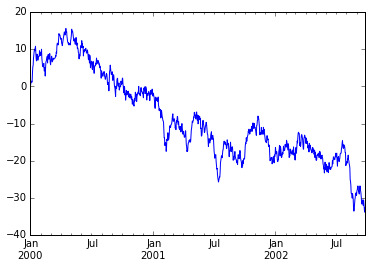

In [217]:
ts.plot()

对于DataFrame来说，plot是一种将所有列及其标签进行绘制的简便方法：

In [224]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

In [225]:
df = df.cumsum()

In [228]:
df

,A,B,C,D
2000-01-01,0.320065,-1.220908,1.703536,-0.847417
2000-01-02,-2.135848,-0.472654,-1.414617,-0.923105
2000-01-03,0.494490,1.397360,1.267843,-0.803603
2000-01-04,0.867636,1.135050,0.328071,1.426203
2000-01-05,-0.402456,1.169363,0.295348,-0.249618
2000-01-06,1.232167,-0.578838,-0.172046,-0.151564
2000-01-07,-0.240426,-0.439760,1.454460,-1.267622
2000-01-08,-0.035627,0.539455,1.463846,1.987646
2000-01-09,0.039600,0.844158,-1.380451,-0.743119
2000-01-10,0.229060,-0.832803,0.345466,-1.456734


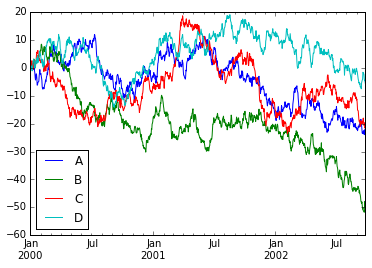

In [226]:
plt.figure;df.plot();plt.legend(loc='best')

# 导入和保存数据

### CSV，参考：[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

1.写入csv文件

In [231]:
df.to_csv('foo.csv')

2.从csv文件中读取：

In [232]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.320065,-1.220908,1.703536,-0.847417
1,2000-01-02,-1.815782,-1.693562,0.288919,-1.770523
2,2000-01-03,-1.321292,-0.296201,1.556762,-2.574125
3,2000-01-04,-0.453656,0.838849,1.884833,-1.147923
4,2000-01-05,-0.856112,2.008211,2.180181,-1.397540
5,2000-01-06,0.376055,1.429373,2.008135,-1.549104
6,2000-01-07,0.135630,0.989613,3.462595,-2.816725
7,2000-01-08,0.100002,1.529067,4.926440,-0.829079
8,2000-01-09,0.139603,2.373226,3.545990,-1.572198
9,2000-01-10,0.368663,1.540423,3.891455,-3.028932


### HDF5，参考：[HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

1.写入HDF5存储

In [233]:
df.to_hdf('foo.h5', 'df')

2.从HDF5存储中读取：

In [235]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,0.320065,-1.220908,1.703536,-0.847417
2000-01-02,-1.815782,-1.693562,0.288919,-1.770523
2000-01-03,-1.321292,-0.296201,1.556762,-2.574125
2000-01-04,-0.453656,0.838849,1.884833,-1.147923
2000-01-05,-0.856112,2.008211,2.180181,-1.397540
2000-01-06,0.376055,1.429373,2.008135,-1.549104
2000-01-07,0.135630,0.989613,3.462595,-2.816725
2000-01-08,0.100002,1.529067,4.926440,-0.829079
2000-01-09,0.139603,2.373226,3.545990,-1.572198
2000-01-10,0.368663,1.540423,3.891455,-3.028932
